# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = f"{url}appid={weather_api_key}&units={units}"


In [4]:
city_data = []

print("Beginning Data Retrieval  ")
print("------------------------  ")

rcount = 1 
set_count = 1 

for i, city in enumerate(cities):
    
    if(i%50 == 0 and i >= 50):
        set_count += 1 
        rcount = 0 
    
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    print("Processing Record %s of Set %s | %s" % (rcount,set_count,city))
    rcount += 1 
    
    try: 
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Clouds": city_clouds,
                          "Wind": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    except:
        print("City not found....")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval  
------------------------  
Processing Record 1 of Set 1 | riyadh
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | faya
Processing Record 4 of Set 1 | barentsburg
City not found....
Processing Record 5 of Set 1 | taoudenni
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | novopskov
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | penzance
Processing Record 14 of Set 1 | okhotsk
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | ngunguru
Processing Record 19 of Set 1 | belushya guba
City not found....
Processing Record 20 of Set 1 | florianopolis
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | husavik
Proces

Processing Record 41 of Set 4 | te anau
Processing Record 42 of Set 4 | terney
Processing Record 43 of Set 4 | ugoofaaru
Processing Record 44 of Set 4 | grand gaube
Processing Record 45 of Set 4 | port macquarie
Processing Record 46 of Set 4 | arinos
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | methoni
Processing Record 49 of Set 4 | kashi
Processing Record 0 of Set 5 | eureka
Processing Record 1 of Set 5 | buala
Processing Record 2 of Set 5 | opobo
City not found....
Processing Record 3 of Set 5 | kurilsk
Processing Record 4 of Set 5 | upington
Processing Record 5 of Set 5 | muriti
Processing Record 6 of Set 5 | almaznyy
Processing Record 7 of Set 5 | jacobabad
Processing Record 8 of Set 5 | abengourou
Processing Record 9 of Set 5 | zonguldak
Processing Record 10 of Set 5 | orda
Processing Record 11 of Set 5 | tabiauea
City not found....
Processing Record 12 of Set 5 | tautira
Processing Record 13 of Set 5 | joao pinheiro
Processing Record 14 of Set 5 | s

Processing Record 36 of Set 8 | raymond
Processing Record 37 of Set 8 | bintulu
Processing Record 38 of Set 8 | baculin
Processing Record 39 of Set 8 | conakry
Processing Record 40 of Set 8 | mayya
Processing Record 41 of Set 8 | ketchikan
Processing Record 42 of Set 8 | louis trichardt
Processing Record 43 of Set 8 | boyolangu
Processing Record 44 of Set 8 | neringa
Processing Record 45 of Set 8 | verishen
Processing Record 46 of Set 8 | zhezkazgan
Processing Record 47 of Set 8 | catuday
Processing Record 48 of Set 8 | pacific grove
Processing Record 49 of Set 8 | liverpool
Processing Record 0 of Set 9 | mirnyy
Processing Record 1 of Set 9 | nabire
Processing Record 2 of Set 9 | ningan
City not found....
Processing Record 3 of Set 9 | port-cartier
Processing Record 4 of Set 9 | ritchie
Processing Record 5 of Set 9 | okato
Processing Record 6 of Set 9 | harper
Processing Record 7 of Set 9 | carnarvon
Processing Record 8 of Set 9 | jerantut
Processing Record 9 of Set 9 | kaeo
Processing

Processing Record 26 of Set 12 | sabancuy
Processing Record 27 of Set 12 | sampit
Processing Record 28 of Set 12 | tortoli
Processing Record 29 of Set 12 | oktyabrskoye
Processing Record 30 of Set 12 | naftah
City not found....
Processing Record 31 of Set 12 | mattru
Processing Record 32 of Set 12 | morant bay
Processing Record 33 of Set 12 | llano largo
Processing Record 34 of Set 12 | nanortalik
Processing Record 35 of Set 12 | staryy nadym
Processing Record 36 of Set 12 | leh
Processing Record 37 of Set 12 | camacha
Processing Record 38 of Set 12 | dublyany
Processing Record 39 of Set 12 | khair
Processing Record 40 of Set 12 | tsalenjikha
Processing Record 41 of Set 12 | bebra
Processing Record 42 of Set 12 | ondjiva
Processing Record 43 of Set 12 | evans
Processing Record 44 of Set 12 | iralaya
Processing Record 45 of Set 12 | aksha
Processing Record 46 of Set 12 | egvekinot
Processing Record 47 of Set 12 | dunedin
Processing Record 48 of Set 12 | middle island
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
city_data_df = pd.DataFrame(city_data)

city_data_df.to_csv("WeatherPy.csv",encoding="utf=8",index=False)

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Country,Date
0,riyadh,24.6877,46.7219,91.40,11,20,9.22,SA,1619419127
1,arraial do cabo,-22.9661,-42.0278,72.64,90,7,6.29,BR,1619419381
2,faya,18.3851,42.4509,73.40,42,40,0.94,SA,1619419381
3,taoudenni,22.6783,-3.9836,85.23,16,0,8.81,ML,1619419381
4,east london,-33.0153,27.9116,68.00,64,0,2.30,ZA,1619419382
...,...,...,...,...,...,...,...,...,...
560,kamiiso,41.8167,140.6500,50.00,25,40,10.36,JP,1619419581
561,san cristobal,7.7669,-72.2250,67.10,83,85,1.34,VE,1619419581
562,clyde river,70.4692,-68.5914,23.00,100,90,11.50,CA,1619419582
563,wschowa,51.8070,16.3166,42.01,61,4,5.01,PL,1619419582


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

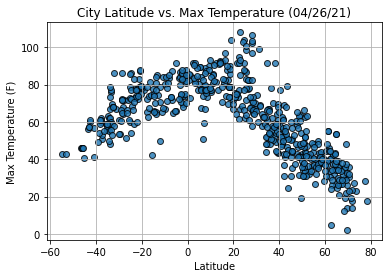

In [18]:
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],label = "Cities",edgecolor = "black", marker='o',linewidths=1,alpha = 0.8)
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Humidity Plot

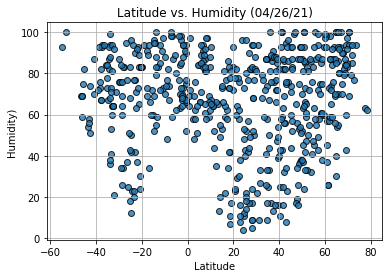

In [19]:
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],label = "Cities",edgecolor = "black", marker='o',linewidths=1,alpha = 0.8)

plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

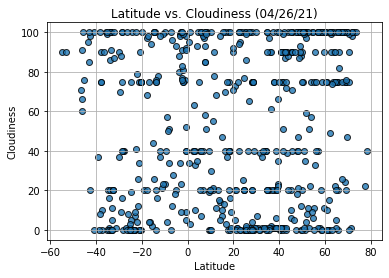

In [20]:
plt.scatter(city_data_df["Lat"],city_data_df["Clouds"],label = "Cities",edgecolor = "black", marker='o',linewidths=1,alpha = 0.8)

plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

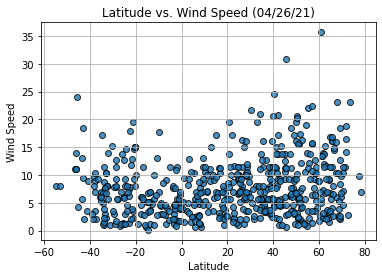

In [21]:
plt.scatter(city_data_df["Lat"],city_data_df["Wind"],label = "Cities",edgecolor = "black", marker='o',linewidths=1,alpha = 0.8)

plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Linear Regression

In [22]:
northern = city_data_df.loc[city_data_df["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern =  city_data_df.loc[city_data_df["Lat"] < 0.0]
southern.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8593787833220681


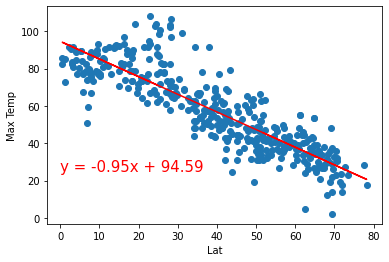

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"],northern["Max Temp"])
print(f"The r-squared is: {rvalue}")
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern["Lat"],northern["Max Temp"])
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.savefig(f"../output_data/fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6862759637005258


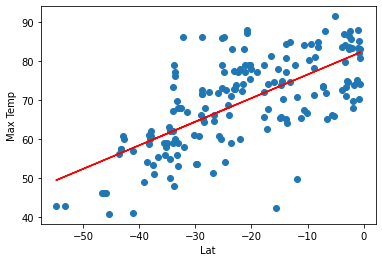

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"],southern["Max Temp"])
print(f"The r-squared is: {rvalue}")
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern["Lat"],southern["Max Temp"])
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.savefig(f"../output_data/fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17205161862792578


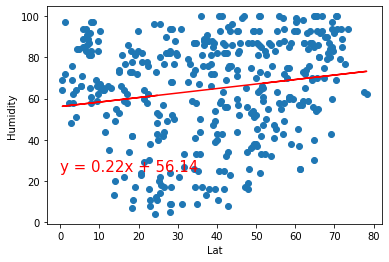

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"],northern["Humidity"])
print(f"The r-squared is: {rvalue}")
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern["Lat"],northern["Humidity"])
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.savefig(f"../output_data/fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13790325455578298


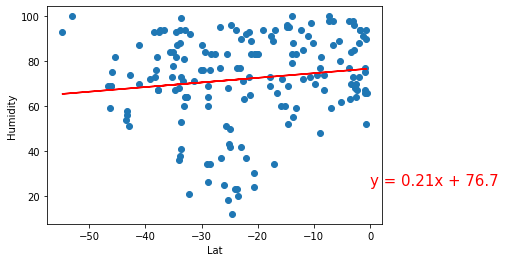

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"],southern["Humidity"])
print(f"The r-squared is: {rvalue}")
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern["Lat"],southern["Humidity"])
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.savefig(f"../output_data/fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18055069600544396


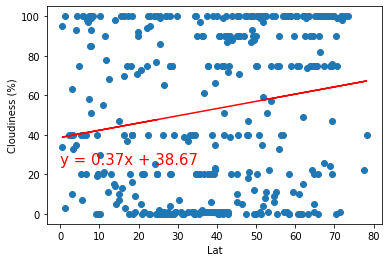

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"],northern["Clouds"])
print(f"The r-squared is: {rvalue}")
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern["Lat"],northern["Clouds"])
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel("Lat")
plt.ylabel("Cloudiness (%)")
plt.savefig(f"../output_data/fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05381759535033055


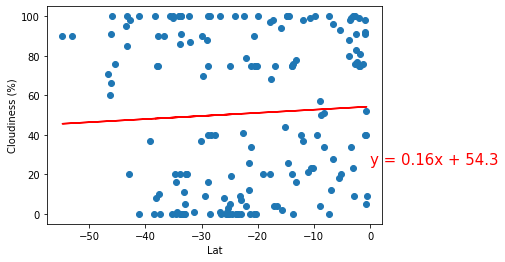

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"],southern["Clouds"])
print(f"The r-squared is: {rvalue}")
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern["Lat"],southern["Clouds"])
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel("Lat")
plt.ylabel("Cloudiness (%)")
plt.savefig(f"../output_data/fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.19918086392377105


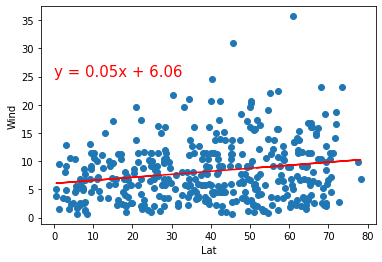

In [29]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"],northern["Wind"])
print(f"The r-squared is: {rvalue}")
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern["Lat"],northern["Wind"])
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel("Lat")
plt.ylabel("Wind")
plt.savefig(f"../output_data/fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.252706718473861


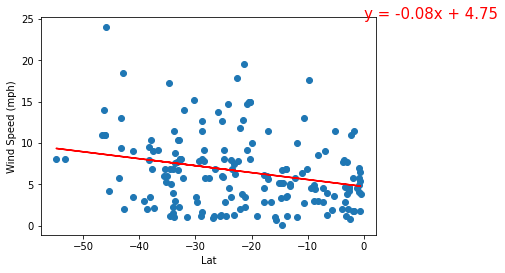

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"],southern["Wind"])
print(f"The r-squared is: {rvalue}")
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern["Lat"],southern["Wind"])
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel("Lat")
plt.ylabel("Wind Speed (mph)")
plt.savefig(f"../output_data/fig12.png")
plt.show()

Observation 1: For southern temp by lat we gain max temp as we gain latitude and for northern temp by lat we lose temp as we gain latitude. This shows the tempature gains temp as we get closer to 0 lat, meaning the perfect temp is between  -20 to 0 to 20
Observation 2: According to the lat vs max temp the perfect lat to go for weathers between 60-80 degrees F is between lat -40 to -20 and 20 to 40
Observation 3: According to the charts there are multiple locations with low humidity,cloudiness, wind speed and with the right temp bettwen 60-80 degrees, all in between lat -40 to 40